In [1]:
# Decision tree is a flow chart which can help in making decisions from previous experiences
# In the below e.g a person will try to decide if he/she should go to a musical night or not

In [3]:
# step 1- read the data set with pandas
import pandas 
df = pandas.read_csv("shows.csv")
print(df)

    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES


In [4]:
# to make a decision tree, all data has to be numerical
# we have to convert non numerical columns "Nationality and "Go" into numerical one
# Pandas has a map() method that takes a dictionary with info on how to convert the values

In [5]:
# Step 2 - Change string values into numerical values
d = {'UK': 0, 'USA': 1, 'N':2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [6]:
# step 3 - separating the feature columns from the target column
# the feature columns are the columns that we try to predict from, 
# the target column is the column with the values we try to predict

In [7]:
# X is the feature column, y is the target column
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Experience <= 9.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Age <= 35.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

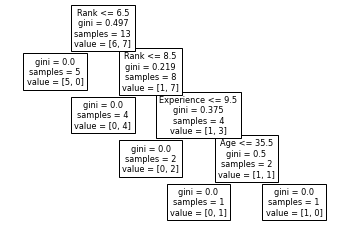

In [8]:
# Step 4 - Creating the actual decision tree, fit it with our details. 
# Start by importing the modules we need
# Create and display a Decision tree

import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("shows.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names = features)

In [9]:
# we can use decision tree to predict new values
# should i go see a show starring a 40 years old American comedian, with 10 years of experience and a comdey ranking of 7?
# use predict() method

print(dtree.predict([[40, 10, 7, 1]]))

[1]


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
print("[1] means 'GO'")
print("[0] means 'NO'")

[1] means 'GO'
[0] means 'NO'


In [11]:
# what would the answer be if the comedian rak was 8? and experience was 11 years?
print(dtree.predict([[40, 11, 8, 1]]))
print("[1] means 'GO'")
print("[0] means 'NO'")

[1]
[1] means 'GO'
[0] means 'NO'


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [12]:
print(dtree.predict([[40, 10, 6, 1]]))
print("[1] means 'GO'")
print("[0] means 'NO'")

[0]
[1] means 'GO'
[0] means 'NO'


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# the results vary because decision tree does not give 100% certain answer, 
# it is based on the prob of outcome

### Confusion Matrix

In [14]:
# in order to assess where errors in the model were made we will use a table known as confusion matrix
# rows represents the actual classes the outcomes should have been
# while the columns represent the predictions we have made.
# using this table we can see which predictions are wrong

In [15]:
# creating a confusion matrix
# Confusion matrixes can be created by predictions made from a logistic regression.
# first, generate actual and predicted values by utilizing NumPy

import numpy

In [16]:
# generate the numbers for "actual and predicted" values
actual = numpy.random.binomial(1, 0.9, size = 1000)
predicted = numpy.random.binomial(1, 0.9, size = 1000)

In [17]:
# In order to create the confusion matrix we need to import metrics from the sklearn module
from sklearn import metrics

In [18]:
# once metrics is imported we can use the confusion matrix function on our actual and predicted values
confusion_matrix = metrics.confusion_matrix(actual, predicted)

In [19]:
# convert the table into confusion matrix display
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [20]:
import matplotlib.pyplot as plt

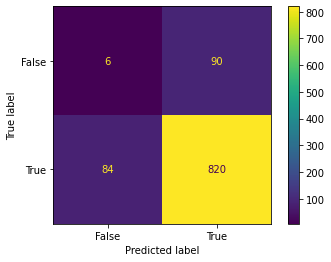

In [21]:
cm_display.plot()
plt.show()

In [ ]:
# Accuracy measures how often the model is correct
# to calculate = (True positive + True Negative) / Total Predictions

In [2]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

Accuracy = metrics.accuracy_score(actual, predicted)

print(Accuracy)


0.816


In [3]:
# Precision of the positives predicted, what percentage is truly positive?
# how to calculate = (True Positive / (True Positive + False Positive))
# Precision does not evaluate the correctly predicted negative cases

In [4]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

Precision = metrics.precision_score(actual, predicted)

print(Precision)


0.8923418423973363


In [5]:
# sensitivity measures how good the model is at predicting positives
# true positive / (True Positive + False Negative)
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

Sensitivity_recall = metrics.recall_score(actual, predicted)

print(Sensitivity_recall)



0.8991228070175439


In [6]:
# Specificity means how well the model is at predicting negative results
# to calculate = True Negative / (True Negative + False Positive)

In [7]:
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

Specificity = metrics.recall_score(actual, predicted, pos_label=0)

print(Specificity)

0.07272727272727272


In [9]:
# F-score is the harmonic mean of precision and sensitivity
# considers both false positive and false negative cases and us good for imbalanced datasets
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.8977777777777778


### Hierarchical Clustering

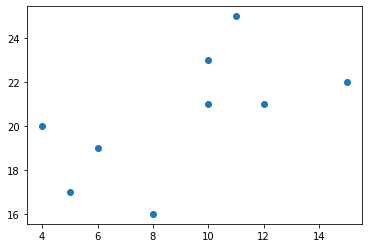

In [12]:
# start by visualizing some data points
import numpy as np
import matplotlib.pyplot as plt

x = [4,6,10,5,8,11,15,10,12]
y = [ 20,19,23,17,16,25,22,21,21]

plt.scatter(x,y)
plt.show()

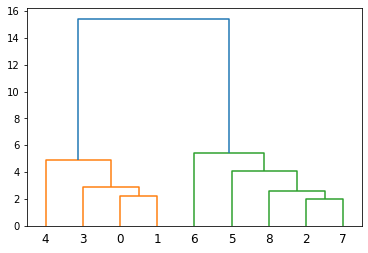

In [13]:
# now we compute the ward linkage using euclidean distance, and visulaize it using a dendrogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
x = [4,6,10,5,8,11,15,10,12]
y = [ 20,19,23,17,16,25,22,21,21]
data = list(zip(x,y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()
